### Importing Relevant Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df = pd.read_csv('Data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Preprocessing

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Visualizations

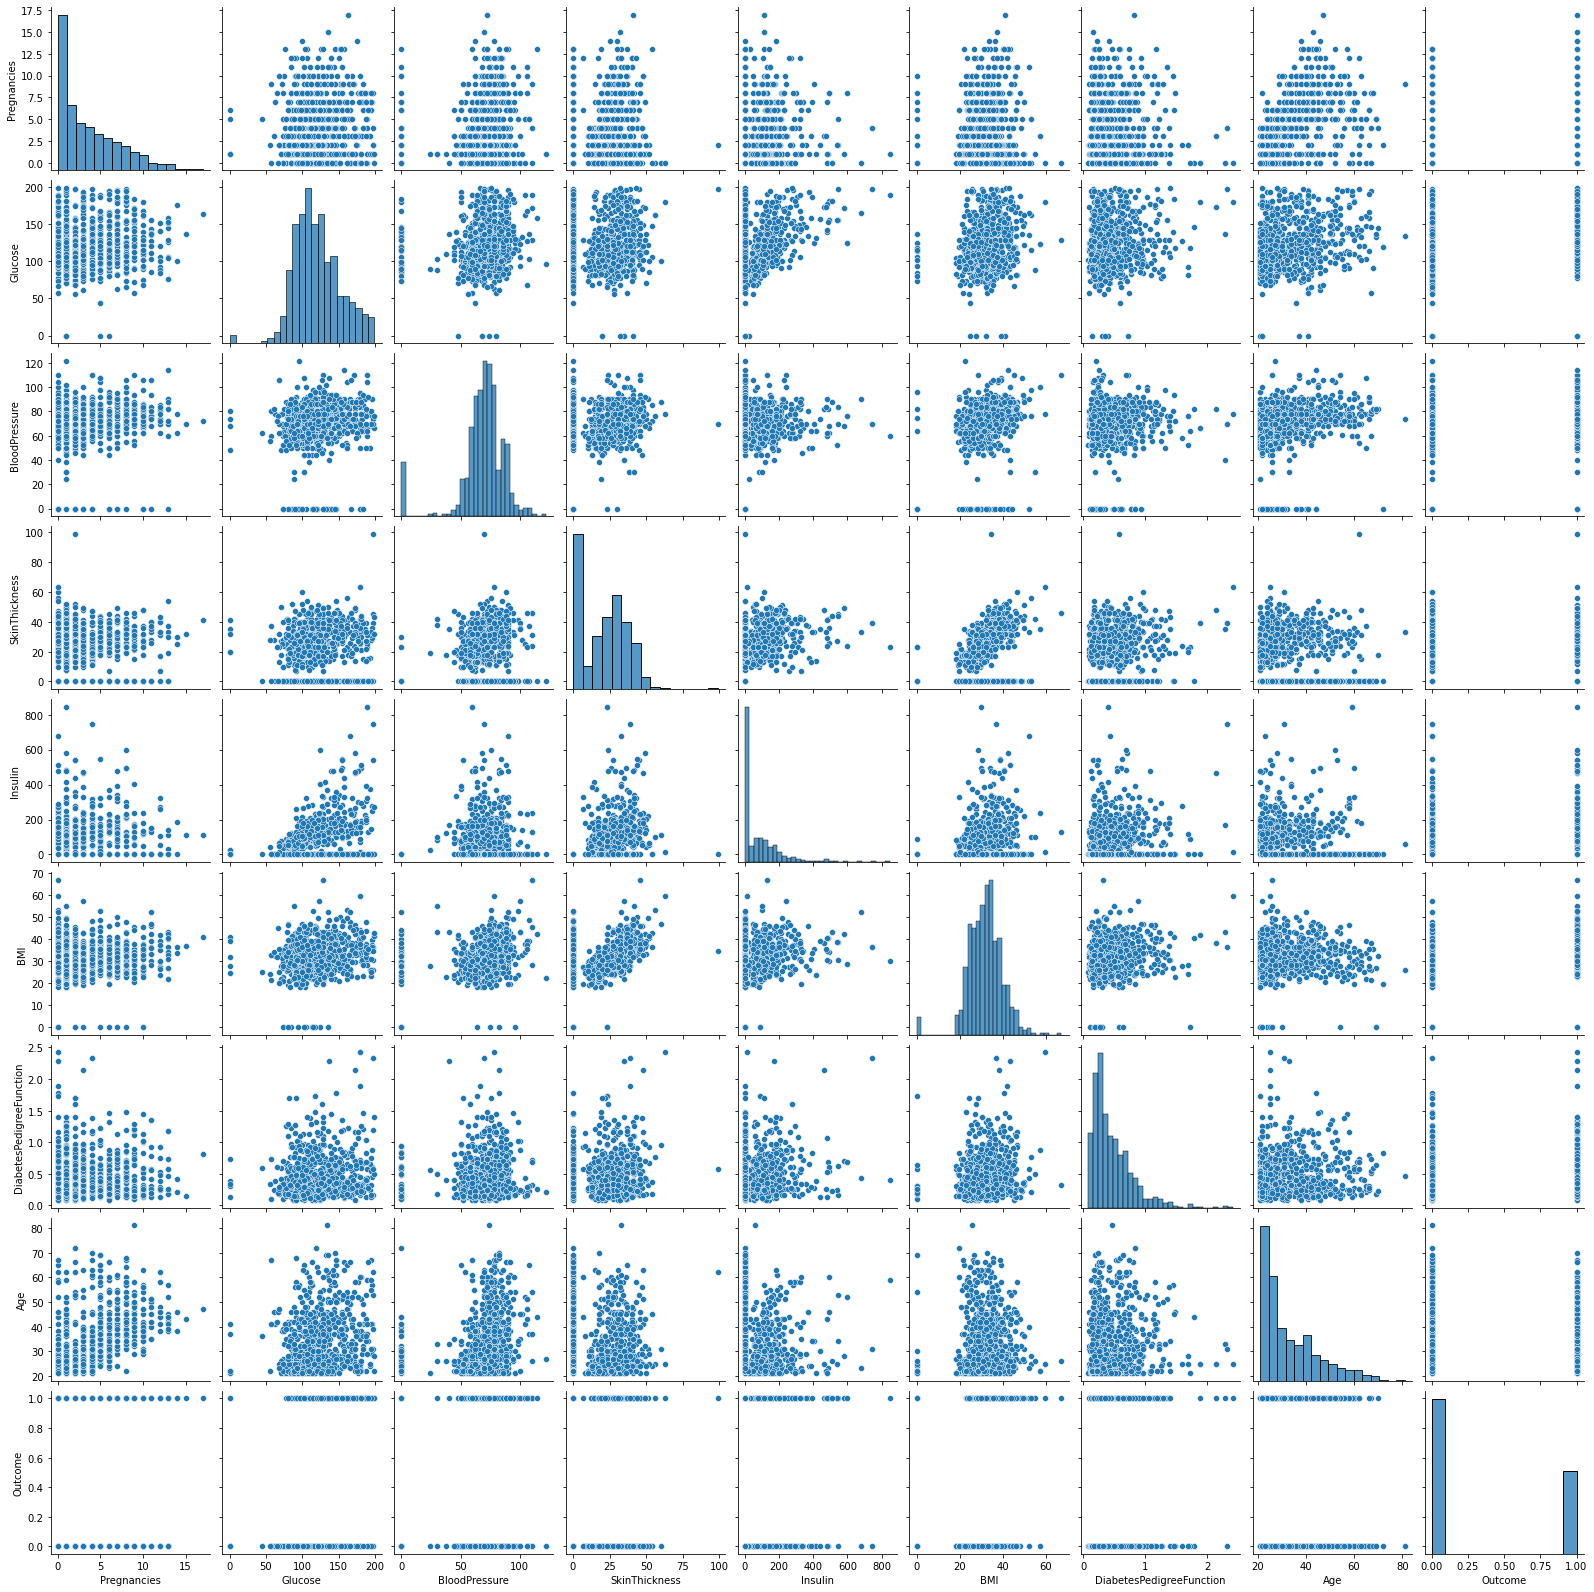

In [8]:
import seaborn as sns
sns.pairplot(df)

### Distributions 

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

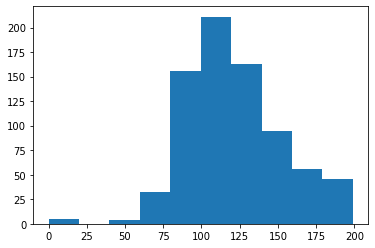

In [10]:
plt.hist(df['Glucose'])

(array([231., 107., 165., 175.,  78.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

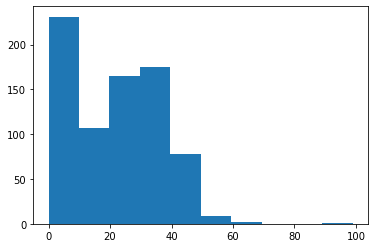

In [11]:
plt.hist(df['SkinThickness'])

### Sweetviz 

In [12]:
import sweetviz as sv

### Analyzing the DataFrame

In [13]:
health_report = sv.analyze(df)

### Show Reports

In [14]:
health_report.show_html('Healthcare.html')

Report Healthcare.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Specifying Target and Making Analysis

In [15]:
health_report = sv.analyze([df,"df"], target_feat = 'Outcome')


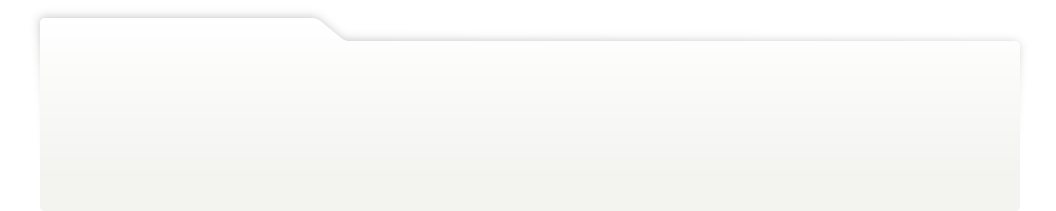
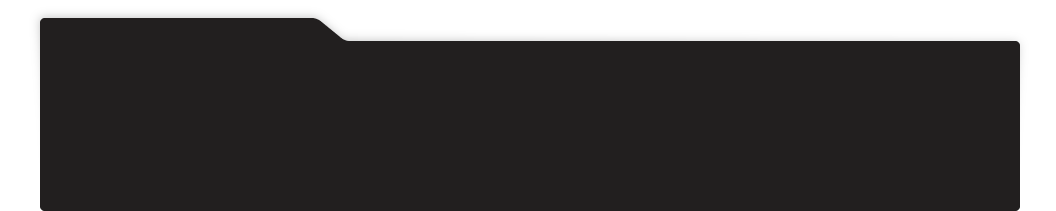
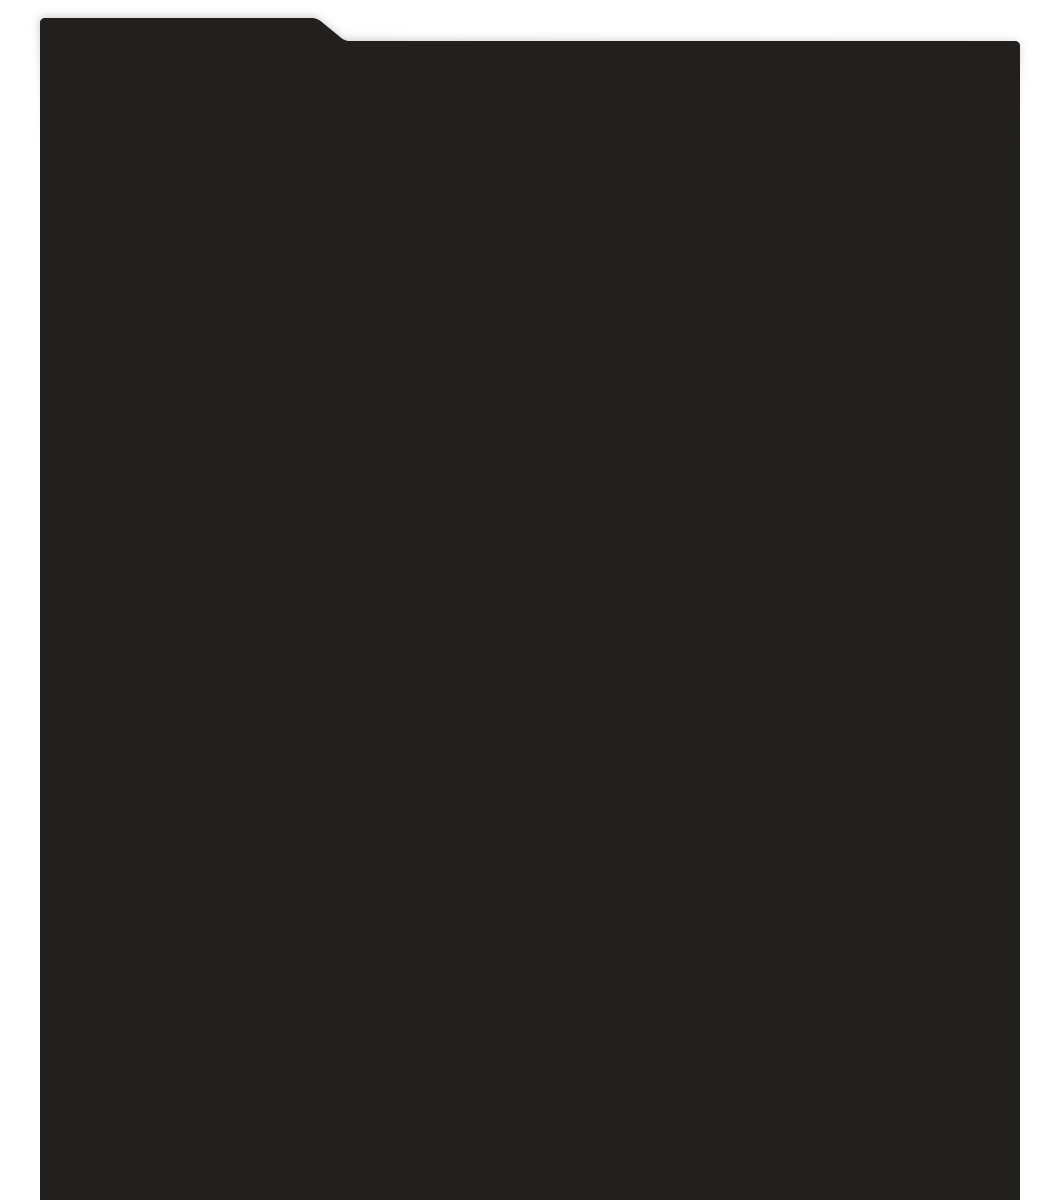
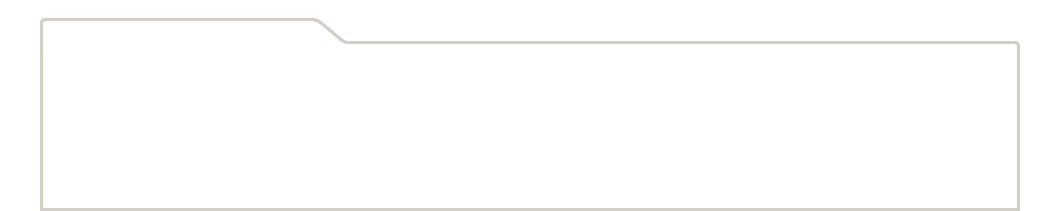
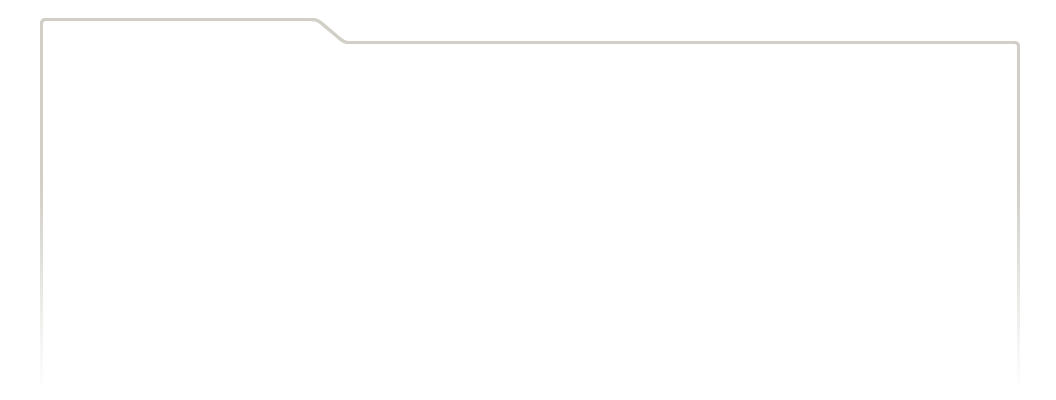
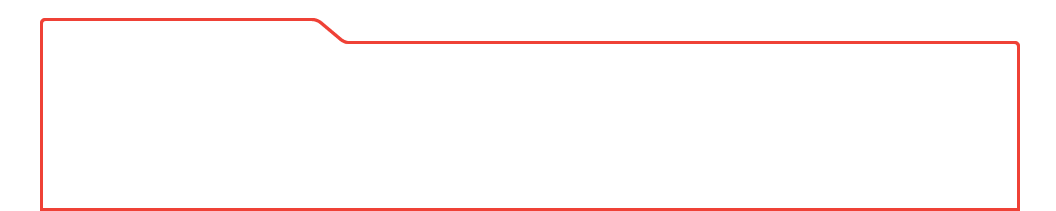
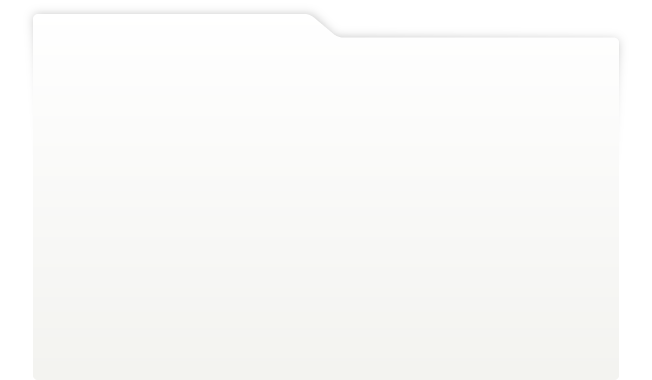
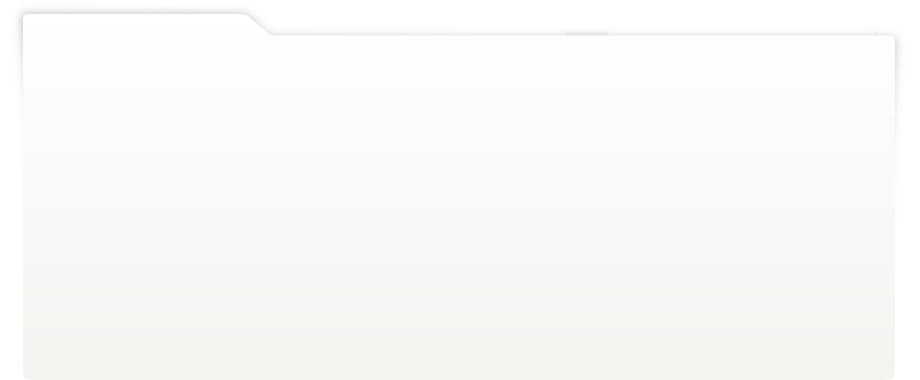
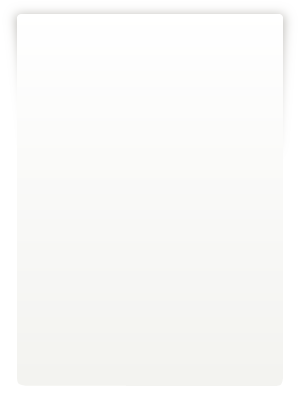
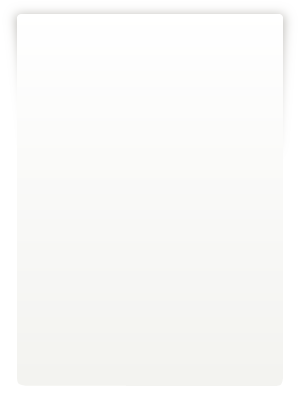
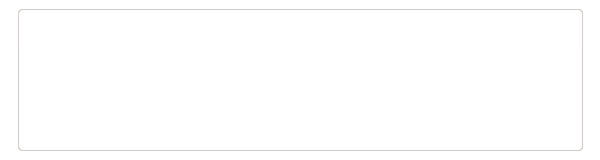
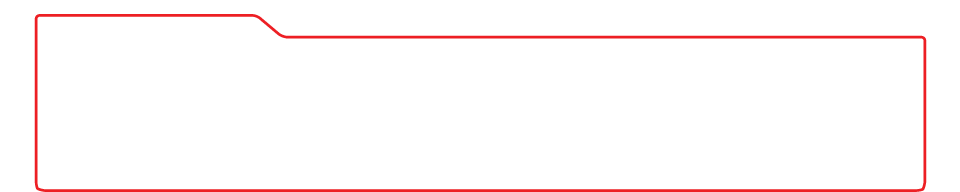
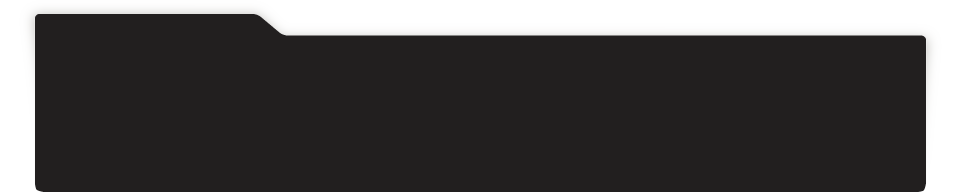
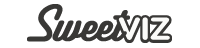
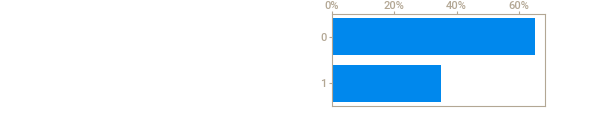
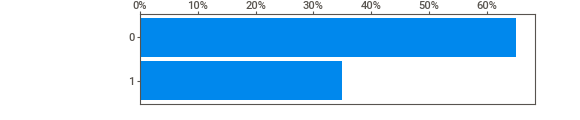
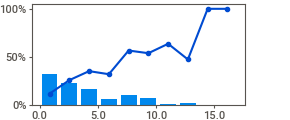
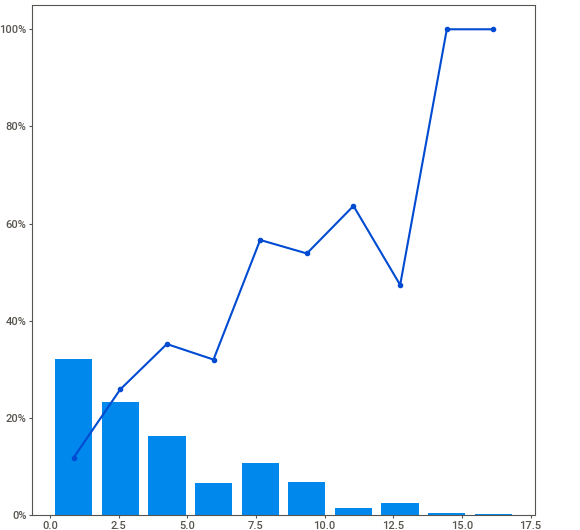
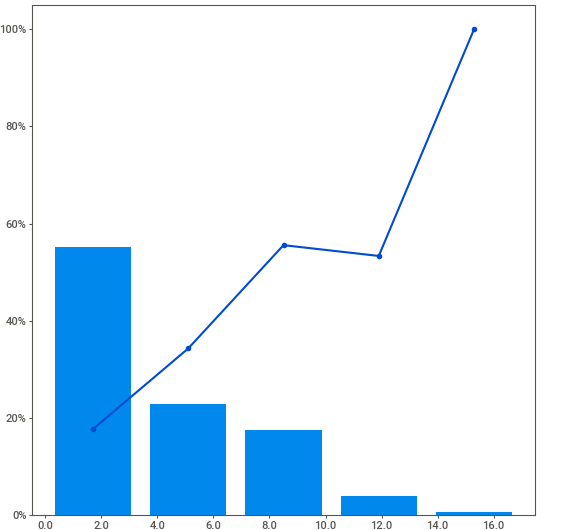
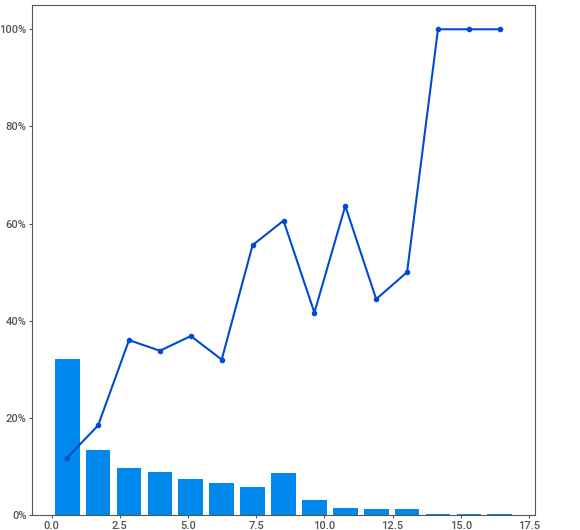
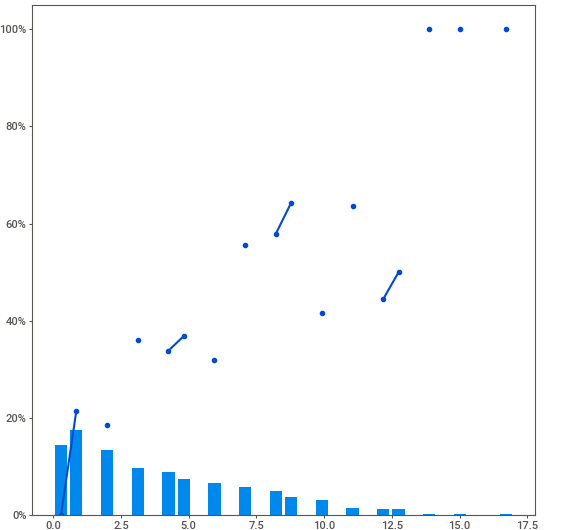
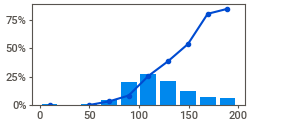
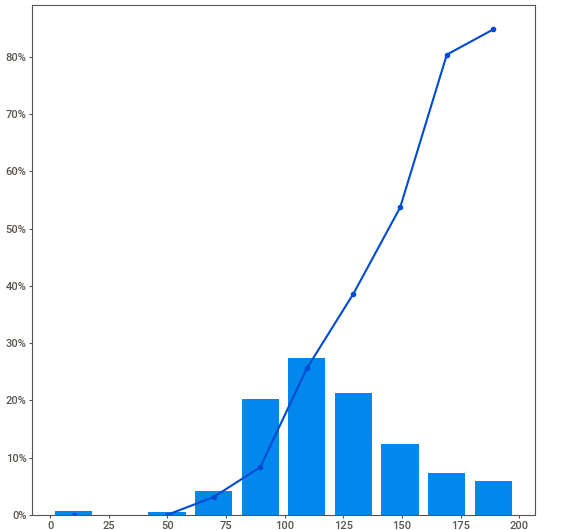
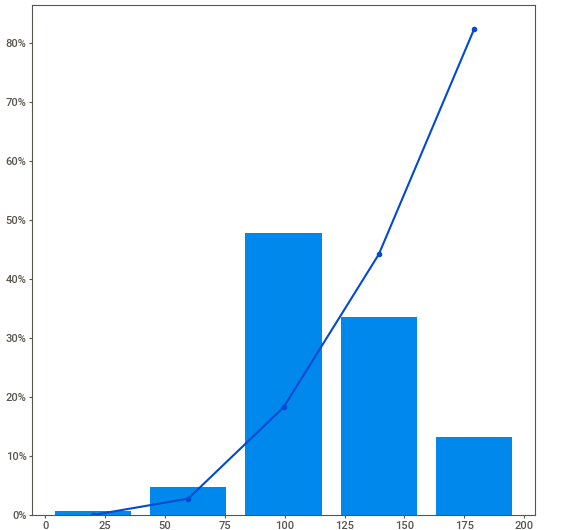
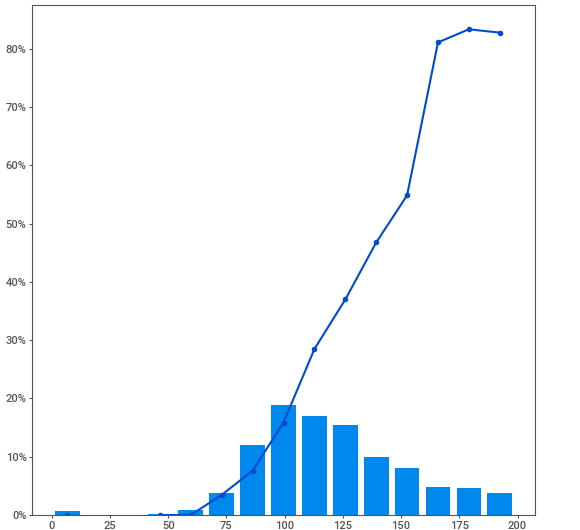
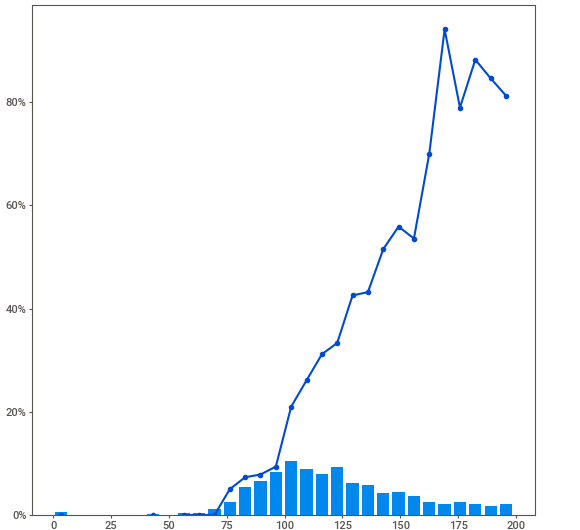
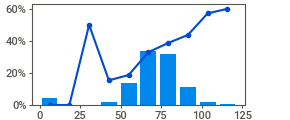
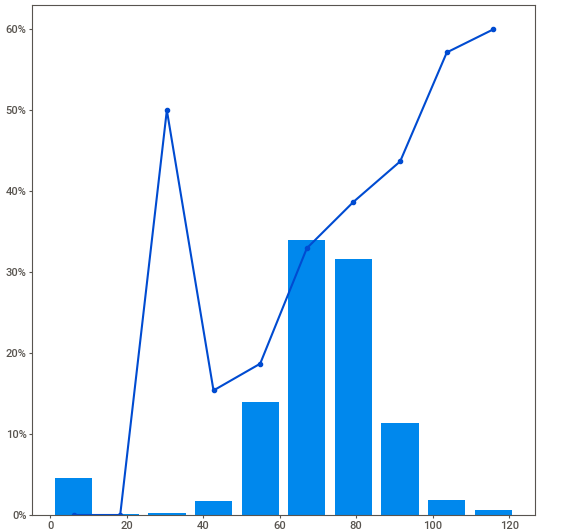
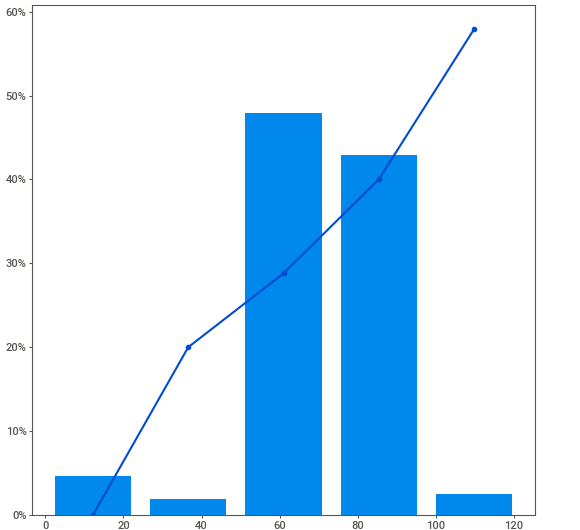
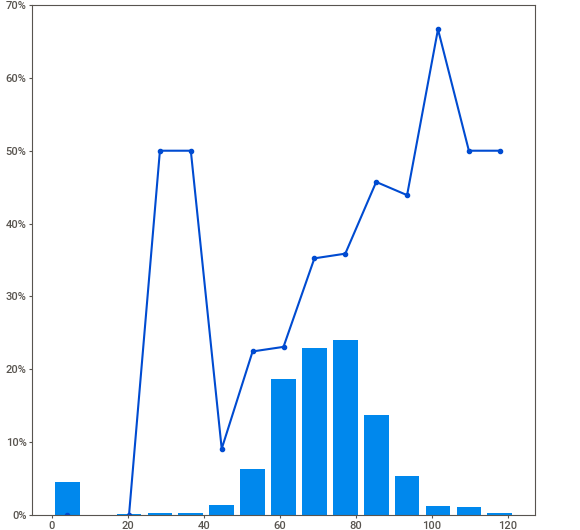
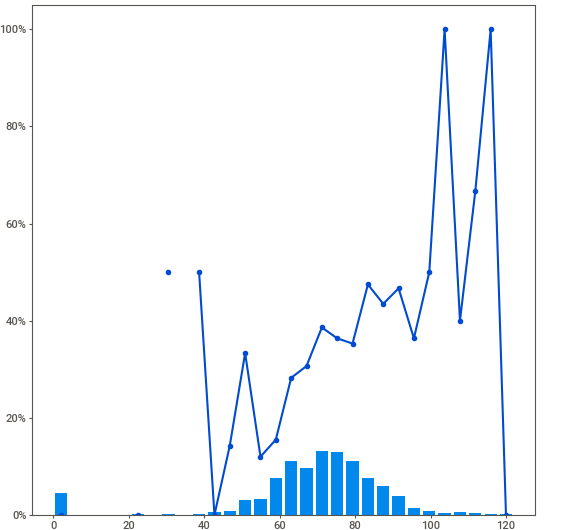
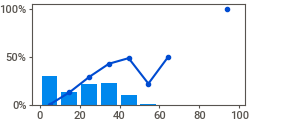
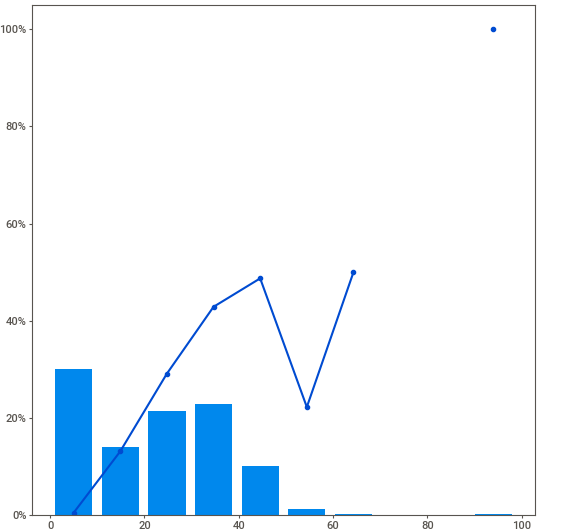
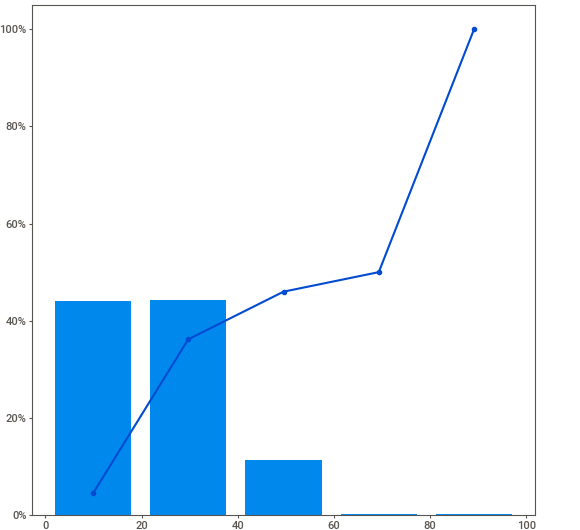
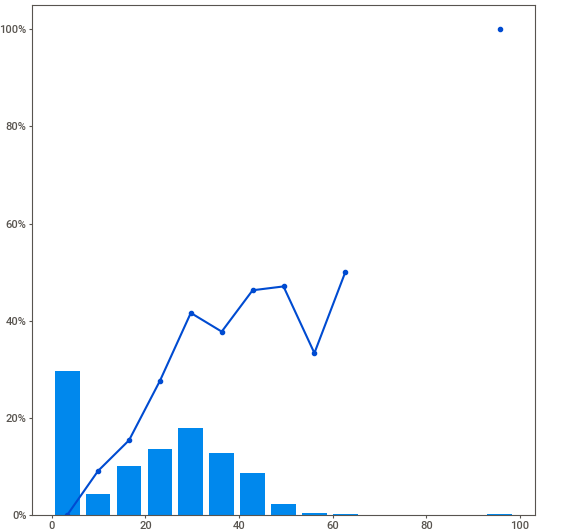
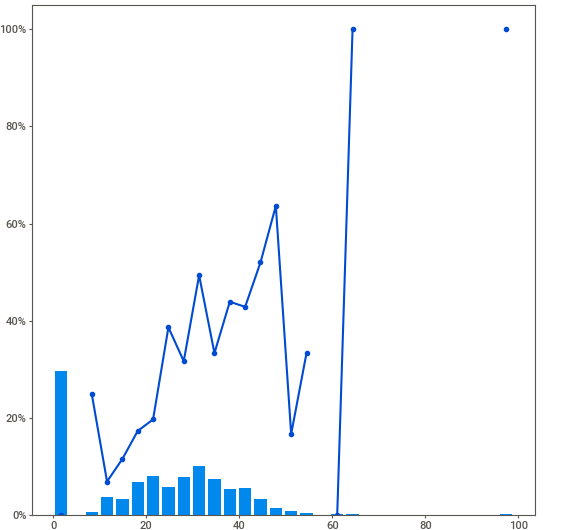
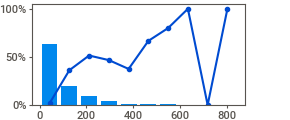
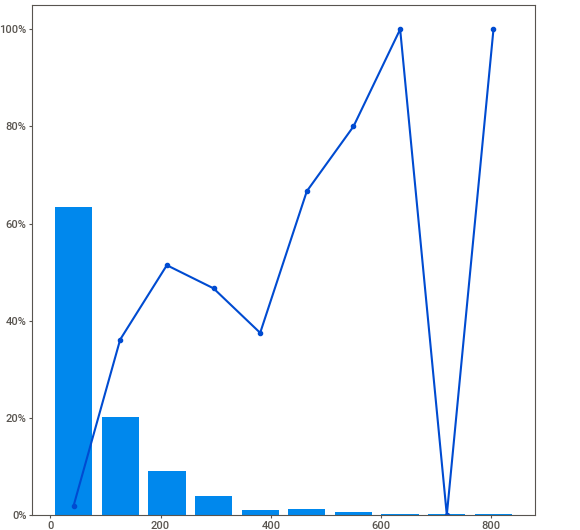
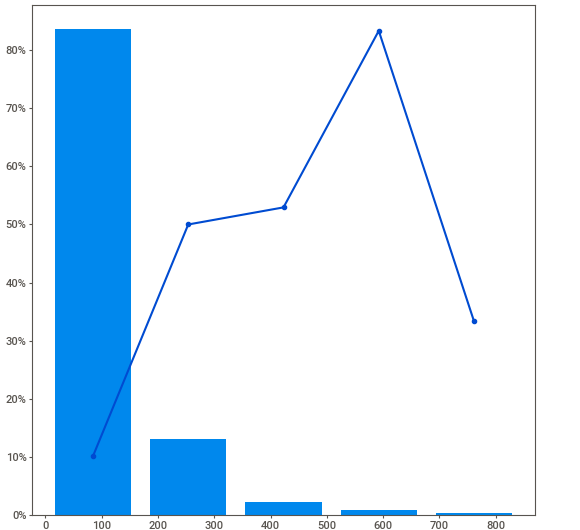
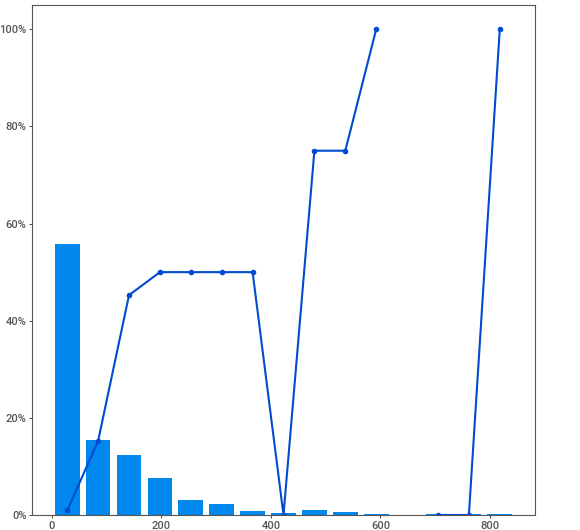
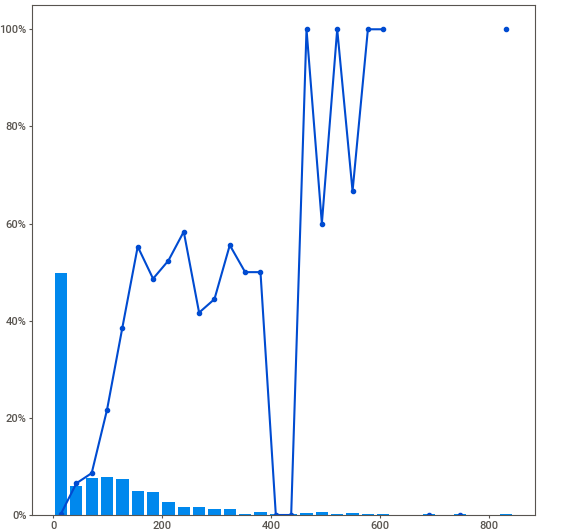
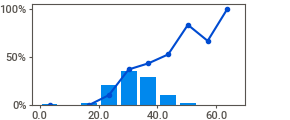
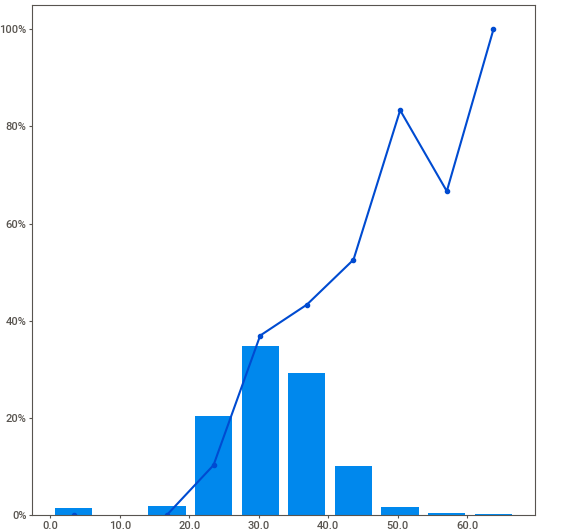
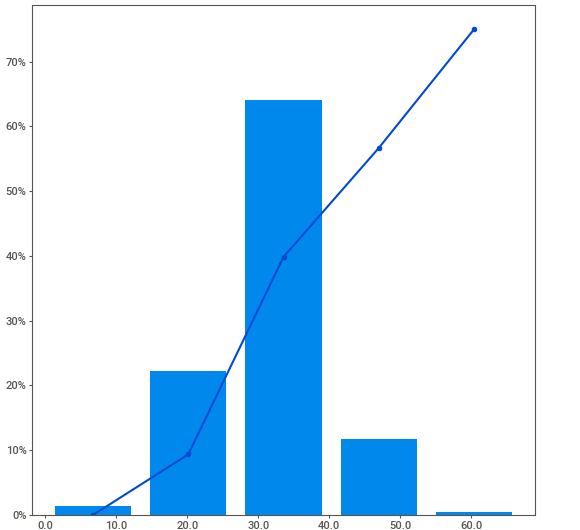
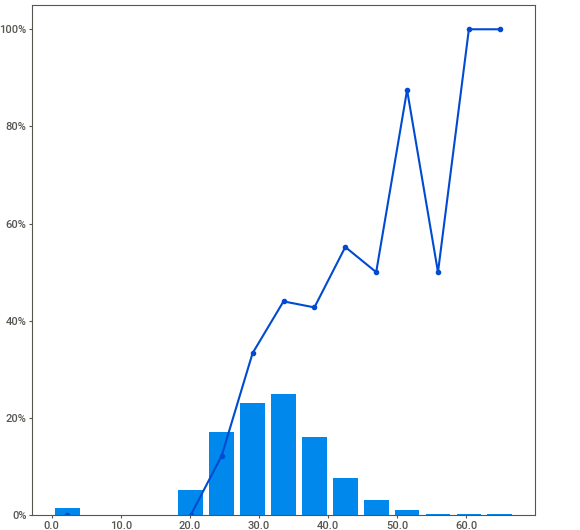
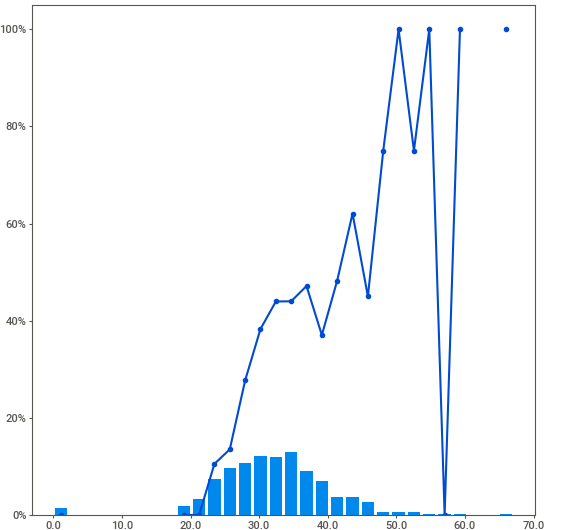
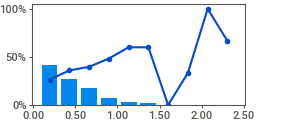
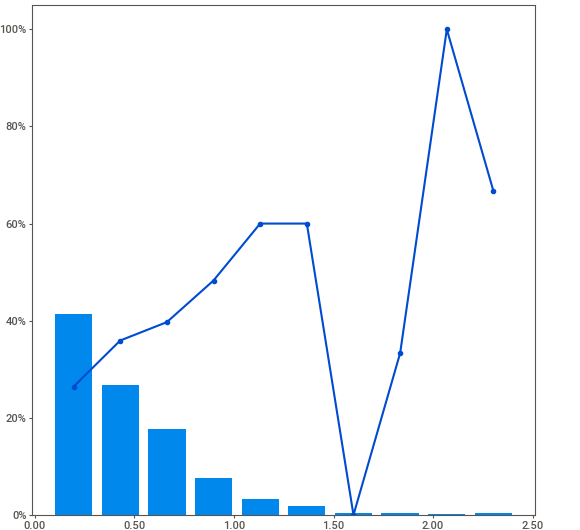
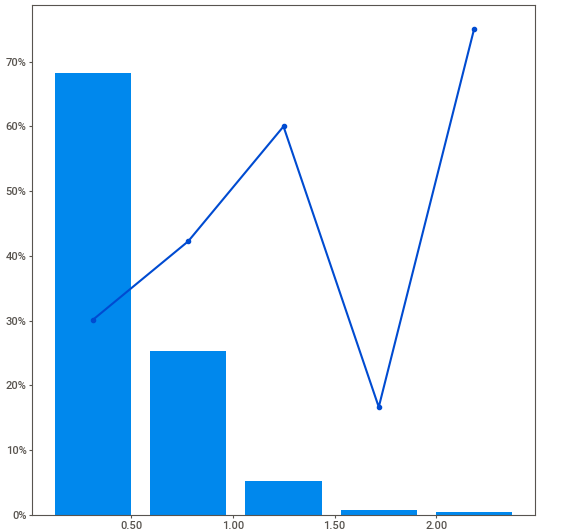
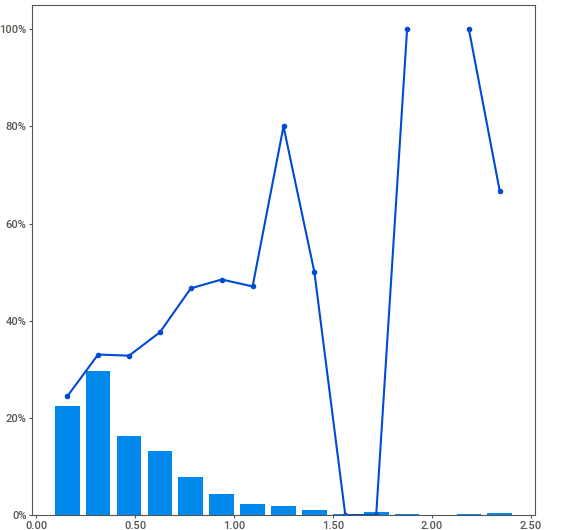
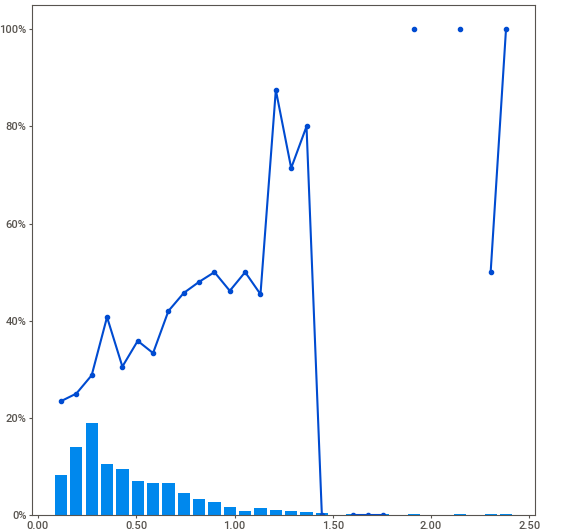
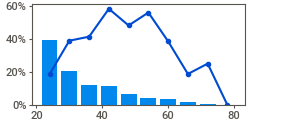
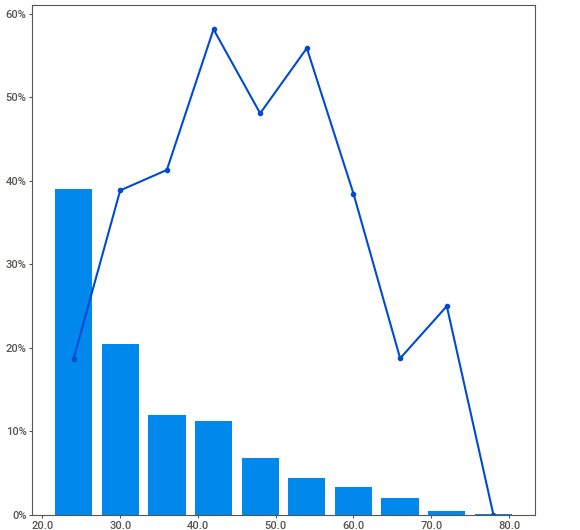
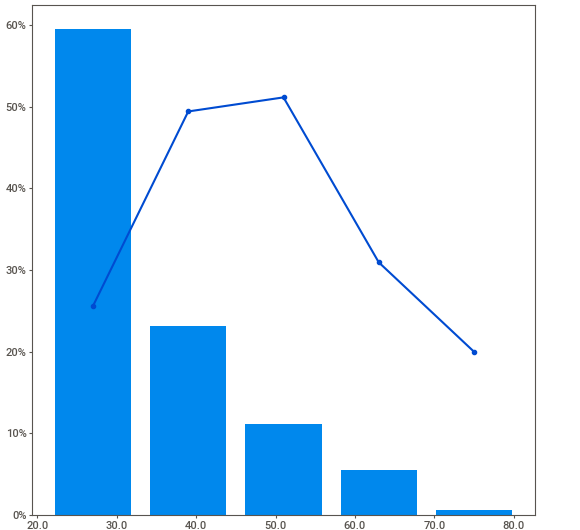
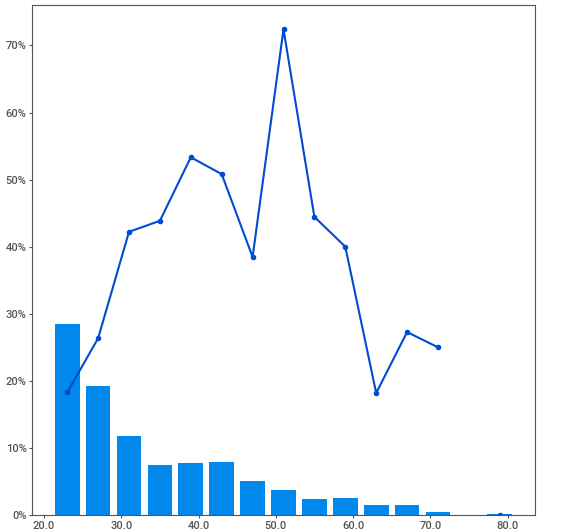
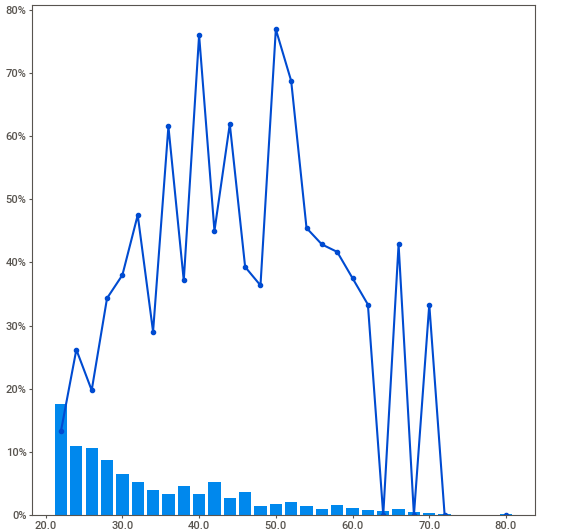
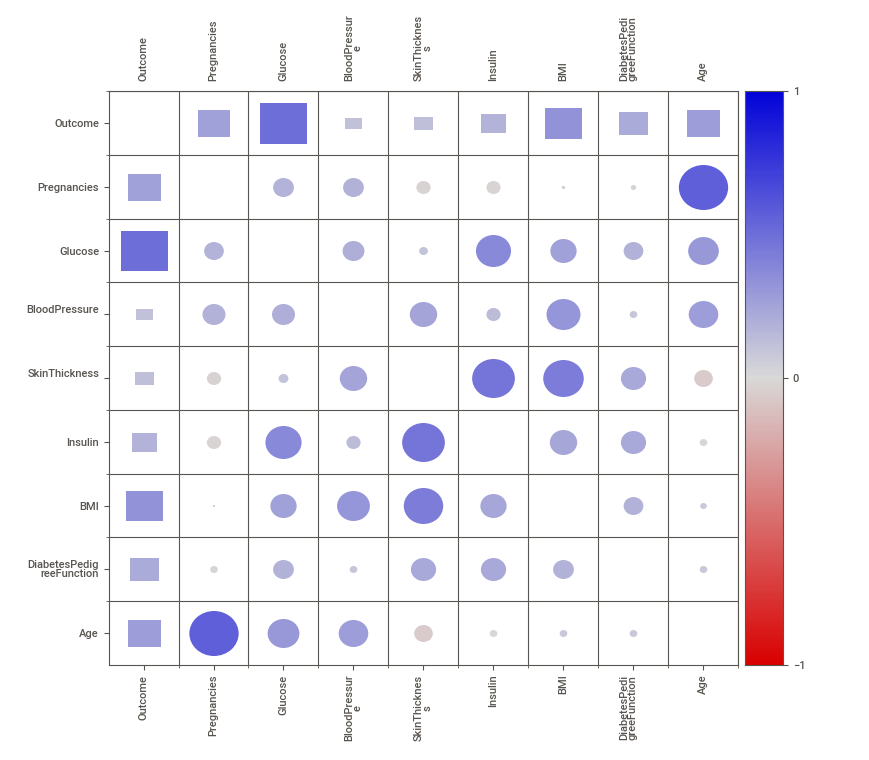
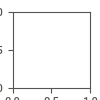

Report 'E:/sweetviz_report.html' was saved to storage.


In [53]:
health_report.show_notebook(w=None, h=None,
scale=None,
layout='vertical',
filepath='E:/sweetviz_report.html')

In [16]:
health_report.show_html('Healthcare.html')

Report Healthcare.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Spliting Data for Analysis And Comparison

In [18]:
x = df.iloc[:, : -1].values
y = df.iloc[:, -1].values

In [21]:
features = df.drop (['Outcome'], axis = 1)

In [22]:
features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [23]:
target = df['Outcome']

### Building Model

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.25, random_state = 0)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [30]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train_std = scale.fit_transform(x_train)
x_test_std = scale.transform(x_test)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(x_train_std, y_train)

KNeighborsClassifier(n_neighbors=25)

In [38]:
knn_pred = knn.predict(x_test_std)

No handles with labels found to put in legend.


Model Validation ==>

Accuracy Score of KNN Model::
0.7604166666666666

 Classification Report::
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       130
           1       0.71      0.44      0.54        62

    accuracy                           0.76       192
   macro avg       0.74      0.68      0.69       192
weighted avg       0.75      0.76      0.74       192
 


 ROC Curve


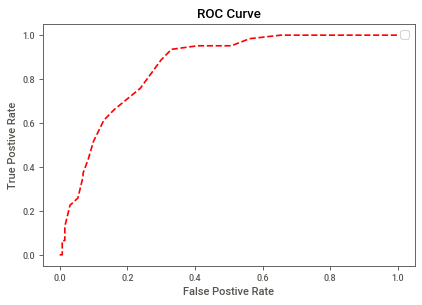

In [43]:
from sklearn import metrics
print("Model Validation ==>\n")
print('Accuracy Score of KNN Model::')
print(metrics.accuracy_score(y_test, knn_pred))
print("\n", "Classification Report::")
print(metrics.classification_report(y_test, knn_pred), '\n')
print("\n", "ROC Curve")
knn_prob = knn.predict_proba(x_test_std)
knn_prob1 = knn_prob[:,1]
fpr, tpr, thresh = metrics.roc_curve(y_test, knn_prob1)
roc_auc_knn = metrics.auc(fpr, tpr)
plt.figure(dpi = 80)
plt.title("ROC Curve")
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.plot(fpr, tpr, 'r--', color = 'red')
plt.legend()

In [46]:
from sklearn.svm import SVC
classifier_rbf = SVC(kernel = 'rbf', random_state = 0, probability = True, C=1)
classifier_rbf.fit(x_train_std, y_train)

SVC(C=1, probability=True, random_state=0)

In [49]:
svc_pred_rbf = classifier_rbf.predict(x_test_std)

In [51]:
print("Model Validation ==>\n")
print("RBF Kernel Accuracy of SVC Classifier::")
print(metrics.accuracy_score(y_test, svc_pred_rbf))
print("\n", "Classification Report::")
print(metrics.classification_report(y_test, svc_pred_rbf), '\n')
print("\n", "ROC Curve")
svc_prob_rbf1 = classifier_rbf.predict_proba(x_test_std)
knn_prob_rbf1 = svc_prob_rbf[:,1]
fpr, tpr, thresh = metrics.roc_curve(y_test, svc_prob_rbf1)
roc_auc_svc = metrics.auc(fpr, tpr)
plt.figure(dpi = 80)
plt.title('ROC Curve')
plt.xlabel('False Poative Rate')
plt.ylabel('True Postive Rate')
plt.plot(fpr, tpr, 'r--', color = 'red')
plt.legend()

Model Validation ==>

RBF Kernel Accuracy of SVC Classifier::
0.7760416666666666

 Classification Report::
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       130
           1       0.71      0.52      0.60        62

    accuracy                           0.78       192
   macro avg       0.75      0.71      0.72       192
weighted avg       0.77      0.78      0.77       192
 


 ROC Curve


ValueError: y should be a 1d array, got an array of shape (192, 2) instead.